In [7]:
# Step 1: Change the Number of Weights and Bias
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic data with 5 features
np.random.seed(42)
X = np.random.rand(100, 5)  # 5 input features
y = 3*X[:, 0] + 2*X[:, 1] - X[:, 2] + 4*X[:, 3] + 0.5*X[:, 4] + np.random.randn(100,)

# Initial weights and bias
weights = np.random.rand(5)  # 5 weights for 5 features
bias = np.random.rand()

print("Initial Weights:", weights)
print("Initial Bias:", bias)


Initial Weights: [0.0200712  0.32207917 0.21144801 0.32749735 0.11976213]
Initial Bias: 0.890527280739895


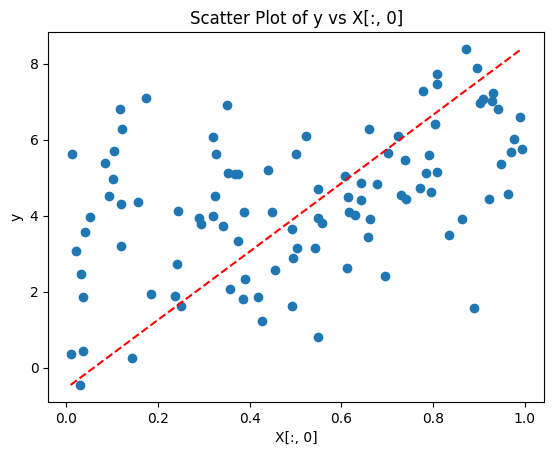

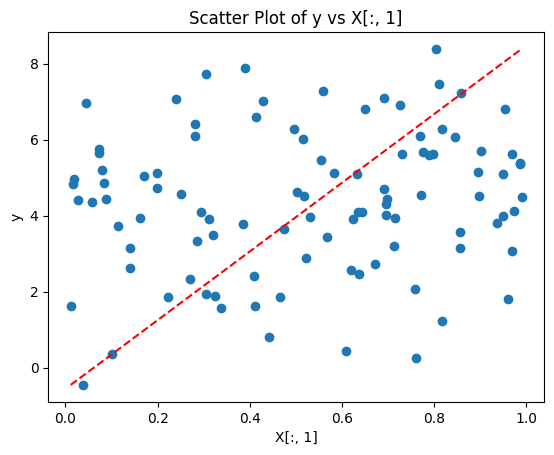

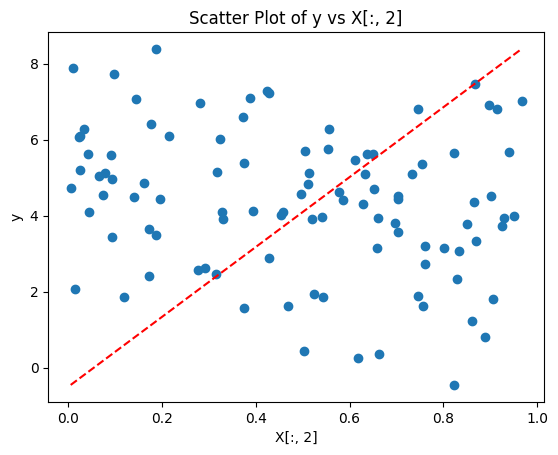

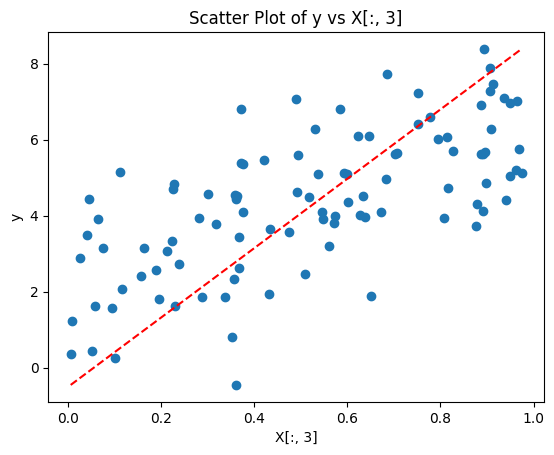

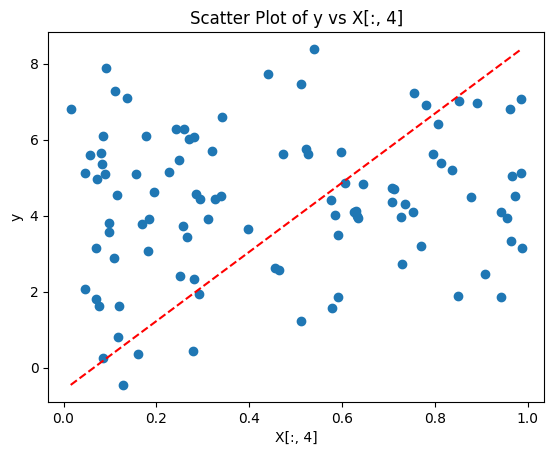

In [26]:
for i in range(X.shape[1]):
  plt.scatter(X[:, i], y)
  plt.plot([min(X[:, i]), max(X[:, i])], [min(y), max(y)], color='red', linestyle='--')
  plt.xlabel(f'X[:, {i}]')
  plt.ylabel('y')
  plt.title(f'Scatter Plot of y vs X[:, {i}]')
  plt.show()

Learning Rate: 0.001, Iterations: 1, Final Cost: 12.1292
Learning Rate: 0.001, Iterations: 2, Final Cost: 12.0855
Learning Rate: 0.001, Iterations: 3, Final Cost: 12.0421
Learning Rate: 0.001, Iterations: 4, Final Cost: 11.9989
Learning Rate: 0.001, Iterations: 5, Final Cost: 11.9558
Learning Rate: 0.001, Iterations: 6, Final Cost: 11.9130
Learning Rate: 0.001, Iterations: 7, Final Cost: 11.8703
Learning Rate: 0.001, Iterations: 8, Final Cost: 11.8279
Learning Rate: 0.001, Iterations: 9, Final Cost: 11.7856
Learning Rate: 0.001, Iterations: 10, Final Cost: 11.7435

--------------------------
Learning Rate: 0.01, Iterations: 1, Final Cost: 12.1292
Learning Rate: 0.01, Iterations: 2, Final Cost: 11.6973
Learning Rate: 0.01, Iterations: 3, Final Cost: 11.2849
Learning Rate: 0.01, Iterations: 4, Final Cost: 10.8910
Learning Rate: 0.01, Iterations: 5, Final Cost: 10.5148
Learning Rate: 0.01, Iterations: 6, Final Cost: 10.1555
Learning Rate: 0.01, Iterations: 7, Final Cost: 9.8123
Learning R

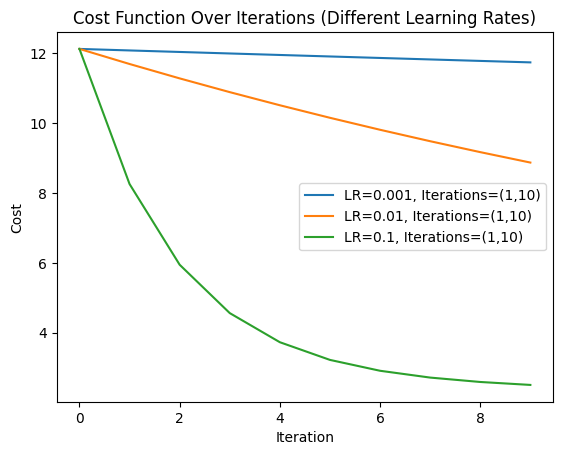

In [36]:
# Step 2: Modify Learning Rate (𝛼) and Observe Its Impact

# Function to perform gradient descent
def gradient_descent(X, y, weights, bias, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Predictions
        y_pred = np.dot(X, weights) + bias
        # Cost function
        cost = np.mean((y_pred - y)**2)
        cost_history.append(cost)
        # Gradients
        dW = (1/m) * np.dot(X.T, (y_pred - y))
        dB = (1/m) * np.sum(y_pred - y)
        # Update weights and bias
        weights -= learning_rate * dW
        bias -= learning_rate * dB
    
    return weights, bias, cost_history

# Experiment with different learning rates
learning_rates = [0.001, 0.01, 0.1]
iterations_list = range(1,11)

for lr in learning_rates:
  for iterations in iterations_list:
    w, b, cost_hist = gradient_descent(X, y, weights.copy(), bias, lr, iterations)
    print(f"Learning Rate: {lr}, Iterations: {iterations}, Final Cost: {cost_hist[-1]:.4f}")
  plt.plot(range(iterations), cost_hist, label=f"LR={lr}, Iterations=(1,10)")
  print("\n--------------------------")
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations (Different Learning Rates)')
plt.legend()
plt.show()

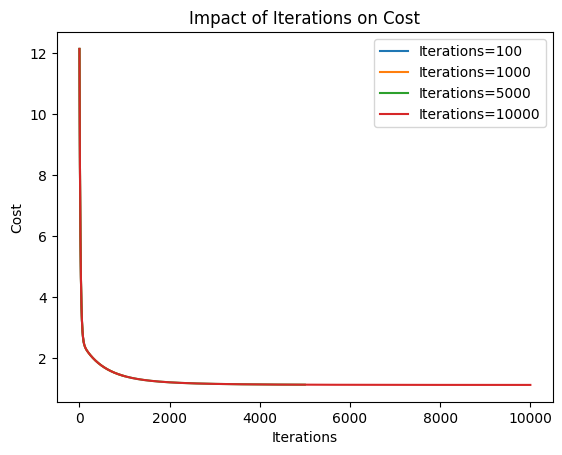

In [37]:
# Step 3: Increase the Number of Iterations and Track Cost Changes

# Experiment with different iteration counts
iteration_counts = [100, 1000, 5000, 10000]

for iters in iteration_counts:
    w, b, cost_hist = gradient_descent(X, y, weights.copy(), bias, 0.01, iters)
    plt.plot(range(iters), cost_hist, label=f"Iterations={iters}")

plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Impact of Iterations on Cost')
plt.legend()
plt.show()


In [38]:
# Step 4: Test the Model on New Data

# Generate new test data
X_test = np.random.rand(10, 5)
y_test = 3*X_test[:, 0] + 2*X_test[:, 1] - X_test[:, 2] + 4*X_test[:, 3] + 0.5*X_test[:, 4]

# Predictions using the trained model
w_final, b_final, _ = gradient_descent(X, y, weights.copy(), bias, 0.01, 1000)
y_pred_test = np.dot(X_test, w_final) + b_final

# Evaluate performance
mse = np.mean((y_pred_test - y_test)**2)
mae = np.mean(np.abs(y_pred_test - y_test))

print("Predictions:", y_pred_test)
print("\nActual:", y_test)
print("\nMean Squared Error (MSE):", mse)
print("\nMean Absolute Error (MAE):", mae)


Predictions: [4.17764139 4.52895687 5.04516376 2.48065863 5.92472317 5.27552947
 4.43766283 3.59189381 5.4305561  3.37575612]

Actual: [3.88770828 4.69410775 5.26347415 1.10727277 7.03917067 5.66118709
 4.32378754 2.9666916  5.95568147 2.66751531]

Mean Squared Error (MSE): 0.46171162927018183

Mean Absolute Error (MAE): 0.5519329046371594


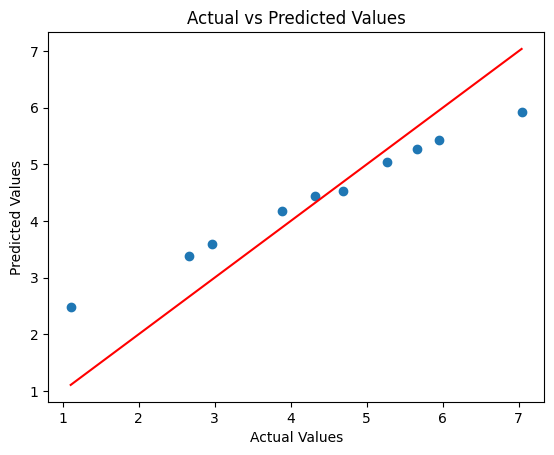

In [40]:
plt.scatter(y_test, y_pred_test)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()